<a href="https://colab.research.google.com/github/mosahle7/ML/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d 'fedesoriano/heart-failure-prediction'

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 11.9MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/heart-failure-prediction.zip','r')
zip_ref.extractall('/content/heart-failure-prediction')
zip_ref.close()

In [61]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
RANDOM_STATE = 55

In [ ]:
df = pd.read_csv('/content/heart-failure-prediction/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
cat_variables = ['Sex',
                 'ChestPainType',
                 'RestingECG',
                 'ExerciseAngina',
                 'ST_Slope']

In [ ]:
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables).astype(int)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                918 non-null    int64
 1   RestingBP          918 non-null    int64
 2   Cholesterol        918 non-null    int64
 3   FastingBS          918 non-null    int64
 4   MaxHR              918 non-null    int64
 5   Oldpeak            918 non-null    int64
 6   HeartDisease       918 non-null    int64
 7   Sex_F              918 non-null    int64
 8   Sex_M              918 non-null    int64
 9   ChestPainType_ASY  918 non-null    int64
 10  ChestPainType_ATA  918 non-null    int64
 11  ChestPainType_NAP  918 non-null    int64
 12  ChestPainType_TA   918 non-null    int64
 13  RestingECG_LVH     918 non-null    int64
 14  RestingECG_Normal  918 non-null    int64
 15  RestingECG_ST      918 non-null    int64
 16  ExerciseAngina_N   918 non-null    int64
 17  ExerciseAngina_Y

In [ ]:
features = [x for x in df.columns if x not in 'HeartDisease']

In [ ]:
len(features)

20

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state= RANDOM_STATE)

In [ ]:
print(f'Train Set: {len(X_train)}, Test Set: {len(X_val)}')

Train Set: 734, Test Set: 184


In [ ]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
309,57,95,0,1,182,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0
30,53,145,518,0,130,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
869,59,150,212,1,157,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1
159,54,160,195,0,130,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
307,53,130,0,0,120,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0


In [ ]:
y_train.head()

,HeartDisease
309,1
30,1
869,0
159,0
307,0


In [ ]:
print('Target Proportion: ',sum(y_train)/len(y_train))

Target Proportion:  0.5517711171662125


In [ ]:
min_samples_list = [2,10,30,50,100,200,300,700]

In [ ]:
train_accuracy = []
test_accuracy = []

for min_samples in min_samples_list:
  model = DecisionTreeClassifier(min_samples_split = min_samples, random_state = RANDOM_STATE).fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_val)
  train_acc = accuracy_score(y_train, train_preds)
  test_acc = accuracy_score(y_val, test_preds)
  train_accuracy.append(train_acc)
  test_accuracy.append(test_acc)


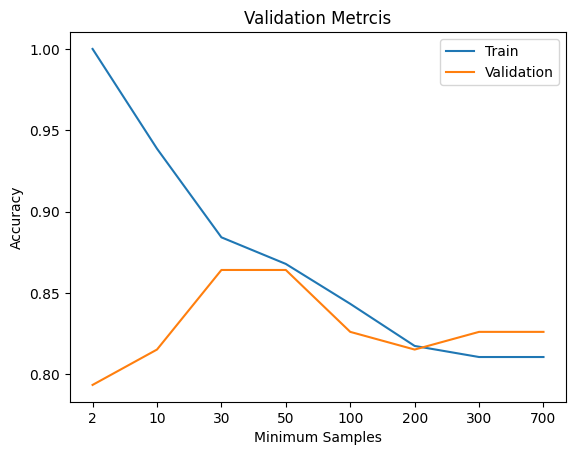

In [ ]:
plt.title('Validation Metrcis')
plt.xlabel('Minimum Samples')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(len(min_samples_list)),labels=min_samples_list)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train','Validation'])

In [ ]:
max_depth_list=[1,2,3,4,8,16,32,64,None]

In [ ]:
train_accuracy = []
test_accuracy = []

for max_depth in max_depth_list:
  model = DecisionTreeClassifier(max_depth = max_depth, random_state = RANDOM_STATE).fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_val)
  train_acc = accuracy_score(y_train, train_preds)
  test_acc = accuracy_score(y_val, test_preds)
  train_accuracy.append(train_acc)
  test_accuracy.append(test_acc)

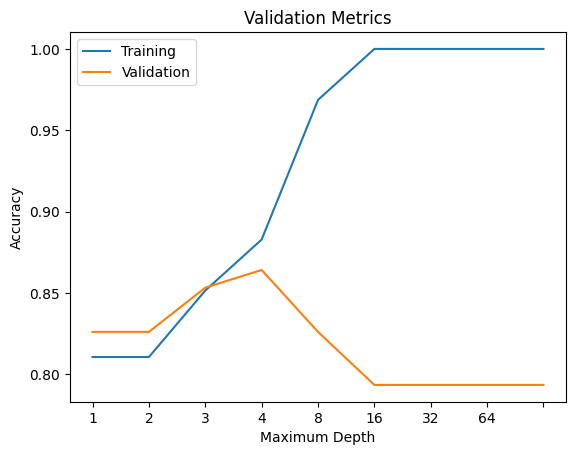

In [ ]:
plt.title('Validation Metrics')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['Training','Validation'])

In [ ]:
min_samples_leaf_list =[1, 5, 10, 20, 25, 30, 50, 60, 75, 100, 200]

In [ ]:
train_accuracy = []
test_accuracy = []

for min_samples_leaf in min_samples_leaf_list:
  model = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf, random_state = RANDOM_STATE).fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_val)
  train_acc = accuracy_score(y_train, train_preds)
  test_acc = accuracy_score(y_val, test_preds)
  train_accuracy.append(train_acc)
  test_accuracy.append(test_acc)

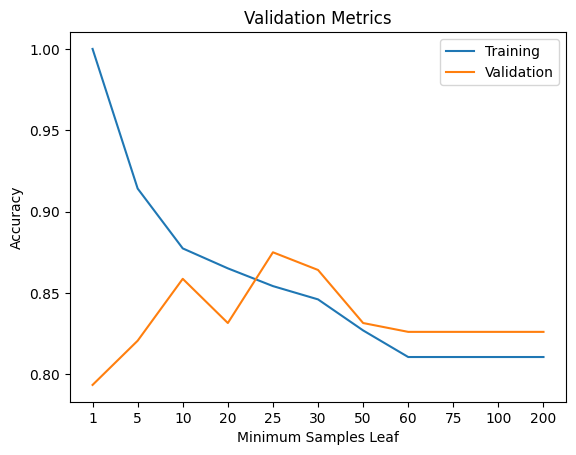

In [ ]:
plt.title('Validation Metrics')
plt.xlabel('Minimum Samples Leaf')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(min_samples_leaf_list)), labels=min_samples_leaf_list)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['Training','Validation'])

In [ ]:
max_features_list = list(range(1,21))

In [ ]:
train_accuracy = []
test_accuracy = []

for max_features in max_features_list:
  model = DecisionTreeClassifier(max_features = max_features, random_state = RANDOM_STATE).fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_val)
  train_acc = accuracy_score(y_train, train_preds)
  test_acc = accuracy_score(y_val, test_preds)
  train_accuracy.append(train_acc)
  test_accuracy.append(test_acc)

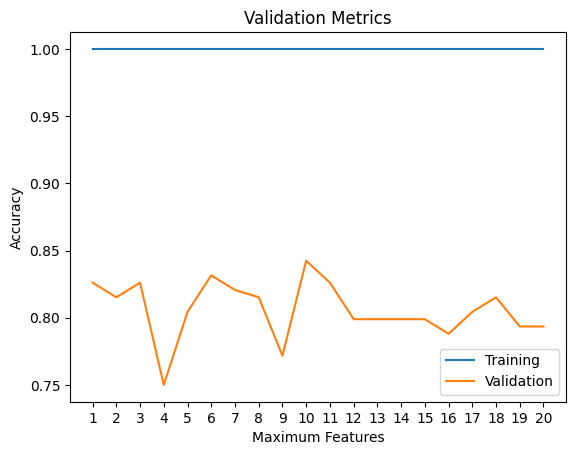

In [ ]:
plt.title('Validation Metrics')
plt.xlabel('Maximum Features')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(max_features_list)), labels=max_features_list)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['Training','Validation'])

In [ ]:
# print(test_accuracy[3], train_accuracy[3])
# print(test_accuracy[6], train_accuracy[6])
# print(test_accuracy[7], train_accuracy[7])

print(test_accuracy)

[0.8260869565217391, 0.8152173913043478, 0.8260869565217391, 0.75, 0.8043478260869565, 0.8315217391304348, 0.8206521739130435, 0.8152173913043478, 0.7717391304347826, 0.842391304347826, 0.8260869565217391, 0.7989130434782609, 0.7989130434782609, 0.7989130434782609, 0.7989130434782609, 0.7880434782608695, 0.8043478260869565, 0.8152173913043478, 0.7934782608695652, 0.7934782608695652]


In [ ]:
max_leaf_nodes_list = [5, 10, 20, 50, 100, 200, None]

In [ ]:

train_accuracy = []
test_accuracy = []

for max_leaf_nodes in max_leaf_nodes_list:
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_val)

    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_val, test_preds)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


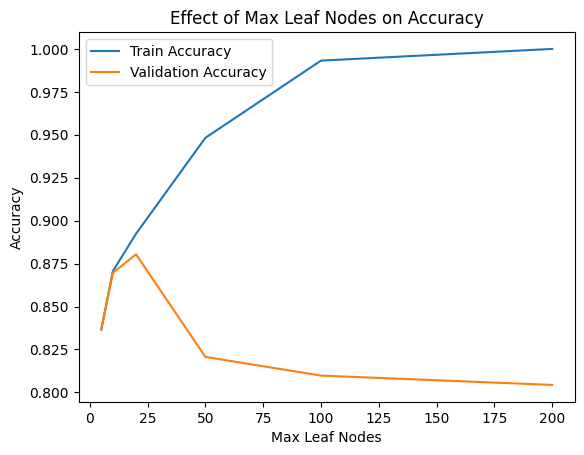

In [ ]:
plt.plot(max_leaf_nodes_list[:-1], train_accuracy[:-1], label='Train Accuracy')
plt.plot(max_leaf_nodes_list[:-1], test_accuracy[:-1], label='Validation Accuracy')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('Effect of Max Leaf Nodes on Accuracy')
plt.legend()
plt.show()

In [87]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             min_samples_leaf = 20,
                                             max_features= 10,
                                             max_leaf_nodes = 10,
                                            #  criterion='gini',
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [88]:
train_preds = decision_tree_model.predict(X_train)
dt_train_accuracy = accuracy_score(y_train, train_preds)
test_preds = decision_tree_model.predict(X_val)
dt_test_accuracy = accuracy_score(y_val, test_preds)
print(f"Train Accuracy: {dt_train_accuracy}")
print(f"Test Accuracy: {dt_test_accuracy}")

Train Accuracy: 0.8487738419618529
Test Accuracy: 0.8695652173913043


In [86]:
print(f"Train Accuracy: {dt_train_accuracy}")
print(f"Test Accuracy: {dt_test_accuracy}")

Train Accuracy: 0.8583106267029973
Test Accuracy: 0.8586956521739131


In [ ]:
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: [0.8365122615803815, 0.8705722070844687, 0.8923705722070845, 0.9482288828337875, 0.9931880108991825, 1.0, 1.0]
Test Accuracy: [0.8369565217391305, 0.8695652173913043, 0.8804347826086957, 0.8206521739130435, 0.8097826086956522, 0.8043478260869565, 0.7934782608695652]


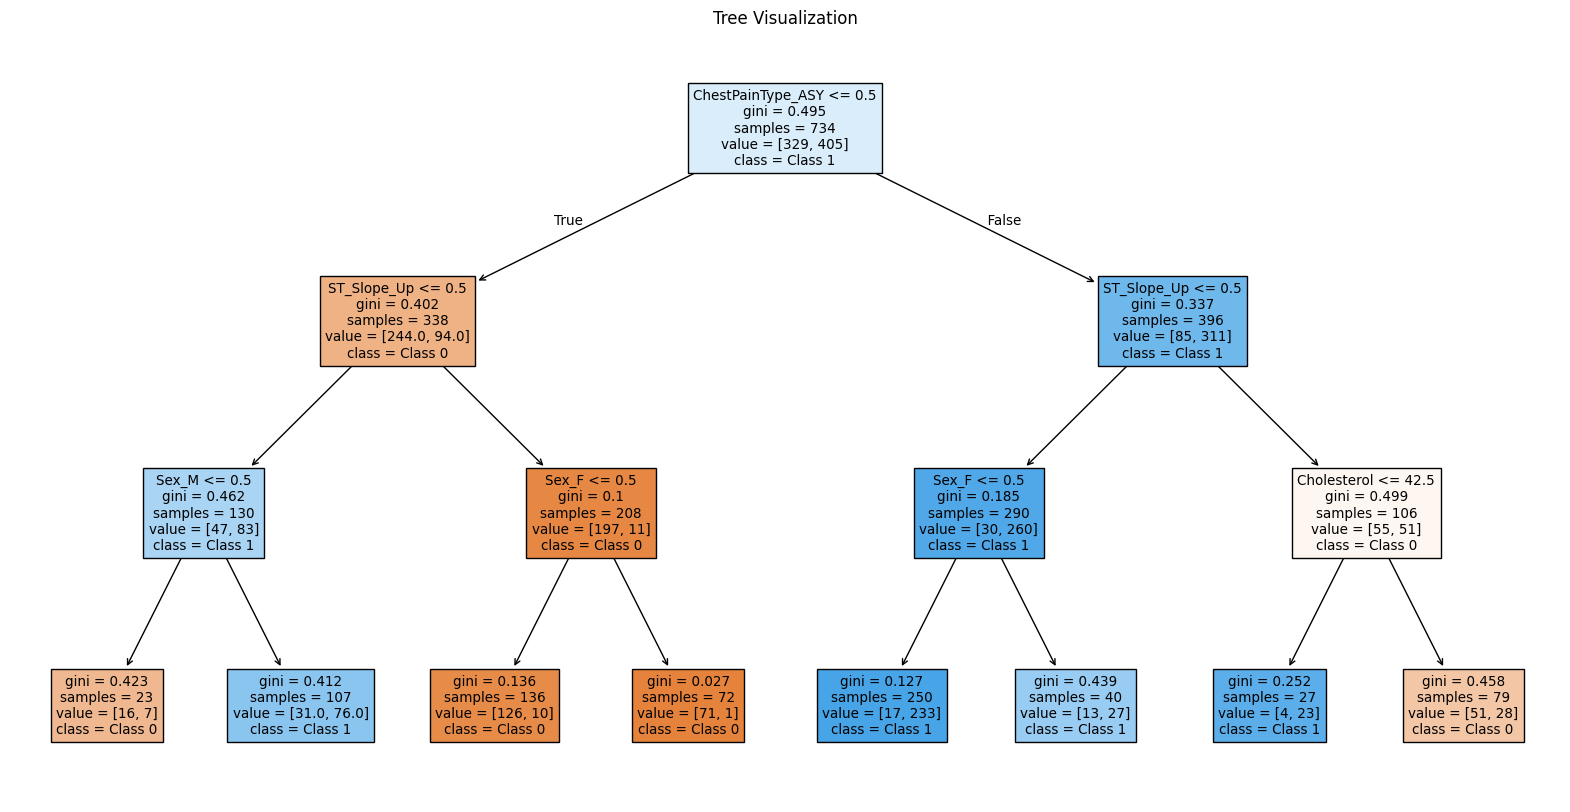

In [69]:
plt.figure(figsize=(20,10))
plot_tree(
    decision_tree_model,
    feature_names=X_train.columns,
    class_names=["Class 0","Class 1"],
    filled = True

)
plt.title("Tree Visualization")
plt.show()

**GridSearchCV**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
RANDOM_STATE = 123

In [ ]:
# param_grid = {
#     'min_samples_split' : [2,10,30,50,100,200,300,700],
#     'max_depth' : [1,2,3,4,8,16,32,64,None],
#     'min_samples_leaf' : [1, 5, 10, 20, 25, 30, 50, 60, 75, 100, 200],
#     'max_features' : list(range(1,21)),
#     'max_leaf_nodes' : [5, 10, 20, 50, 100, 200, None],
#     'criterion': ['gini', 'entropy'],
#     'min_impurity_decrease': [0.0001, 0.01, 0.05, 0.1]
# }

In [ ]:
# dt_model = DecisionTreeClassifier(random_state = RANDOM_STATE)

In [ ]:
# grid_search = GridSearchCV(estimator = dt_model, param_grid=param_grid, cv=5, verbose=2)

In [ ]:
# grid_search.fit(X_train, y_train)

In [ ]:
# print("The best parameters are: ", grid_search.best_params_)
# print("The best score is: ", grid_search.best_score_)

In [ ]:
# best_model = grid_search.best_estimator_

In [ ]:
# test_preds = best_model.predict(X_val)
# test_accuracy = accuracy_score()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
min_samples_split_list = [2,10,30,50,100,200,300,700]
max_depth_list = [1,2,3,4,8,16,32,64,None]
n_estimators_list = [10,50,100,500]

In [ ]:
train_accuracy = []
test_accuracy = []
for min_samples in min_samples_split_list:
  model = RandomForestClassifier(min_samples_split=min_samples, random_state=RANDOM_STATE).fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_val)
  train_accu = accuracy_score(y_train, train_preds)
  test_accu = accuracy_score(y_val, test_preds)

  train_accuracy.append(train_accu)
  test_accuracy.append(test_accu)


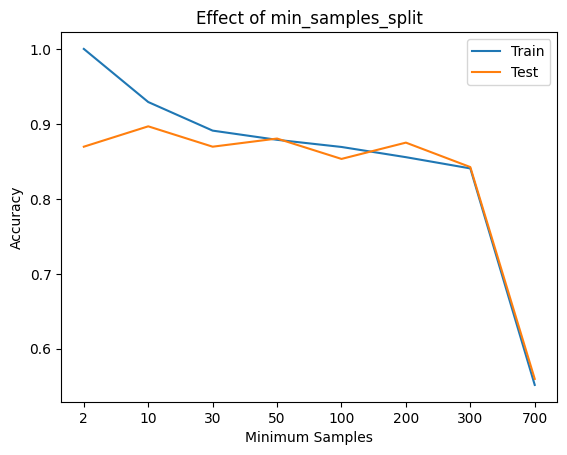

In [ ]:
plt.title("Effect of min_samples_split")
plt.xlabel("Minimum Samples")
plt.ylabel("Accuracy")
plt.xticks(ticks = range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train','Test'])

In [ ]:
train_accuracy = []
test_accuracy = []
for max_depth in max_depth_list:
  model = RandomForestClassifier(max_depth=max_depth, random_state=RANDOM_STATE).fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_val)
  train_accu = accuracy_score(y_train, train_preds)
  test_accu = accuracy_score(y_val, test_preds)

  train_accuracy.append(train_accu)
  test_accuracy.append(test_accu)

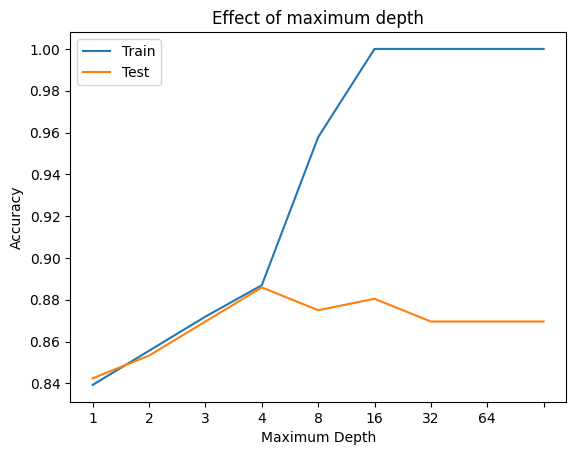

In [ ]:
plt.title("Effect of maximum depth")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.xticks(ticks = range(len(max_depth_list)), labels=max_depth_list)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train','Test'])

In [ ]:
train_accuracy = []
test_accuracy = []
for n_estimators in n_estimators_list:
  model = RandomForestClassifier(n_estimators = n_estimators, random_state=RANDOM_STATE).fit(X_train, y_train)
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_val)
  train_accu = accuracy_score(y_train, train_preds)
  test_accu = accuracy_score(y_val, test_preds)

  train_accuracy.append(train_accu)
  test_accuracy.append(test_accu)

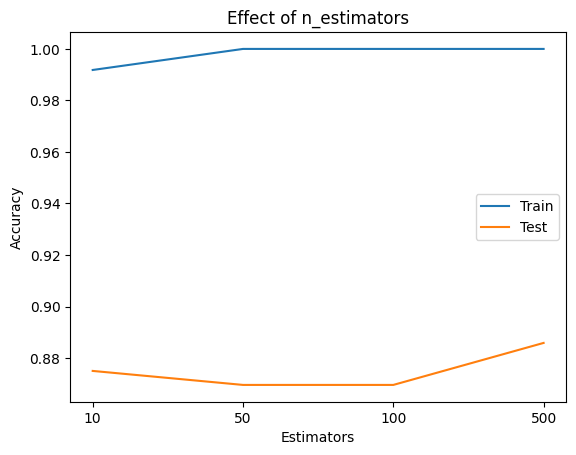

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.xticks(ticks = range(len(n_estimators_list)), labels=n_estimators_list)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train','Test'])

In [ ]:
print("Train: ", train_accuracy)
print("Test: " ,test_accuracy)

Train:  [0.9918256130790191, 1.0, 1.0, 1.0]
Test:  [0.875, 0.8695652173913043, 0.8695652173913043, 0.8858695652173914]


In [ ]:
random_forest_model = RandomForestClassifier(
                                              min_samples_split = 10,
                                              max_depth = 16,
                                              n_estimators = 70,
                                              oob_score = True,
                                              verbose = 2,
                                              random_state = RANDOM_STATE).fit(X_train, y_train)

building tree 1 of 70
building tree 2 of 70
building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70
building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


In [ ]:
train_preds = random_forest_model.predict(X_train)
test_preds = random_forest_model.predict(X_val)

rf_train_accuracy = accuracy_score(y_train, train_preds)
rf_test_accuracy = accuracy_score(y_val, test_preds)

print("Train Accuracy: ",rf_train_accuracy)
print("Test Accuracy: ",rf_test_accuracy)

Train Accuracy:  0.9277929155313351
Test Accuracy:  0.9184782608695652


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [ ]:
print("OOB Score: ", random_forest_model.oob_score_)

OOB Score:  0.8746594005449592


In [ ]:
print("Decision Tree")
print("Train Accuracy: ",dt_train_accuracy)
print("Test Accuracy: ",dt_test_accuracy)

print("Random Forest")
print("Train Accuracy: ",rf_train_accuracy)
print("Test Accuracy: ",rf_test_accuracy)

Decision Tree
Train Accuracy:  0.8283378746594006
Test Accuracy:  0.8532608695652174
Random Forest
Train Accuracy:  0.9277929155313351
Test Accuracy:  0.9184782608695652


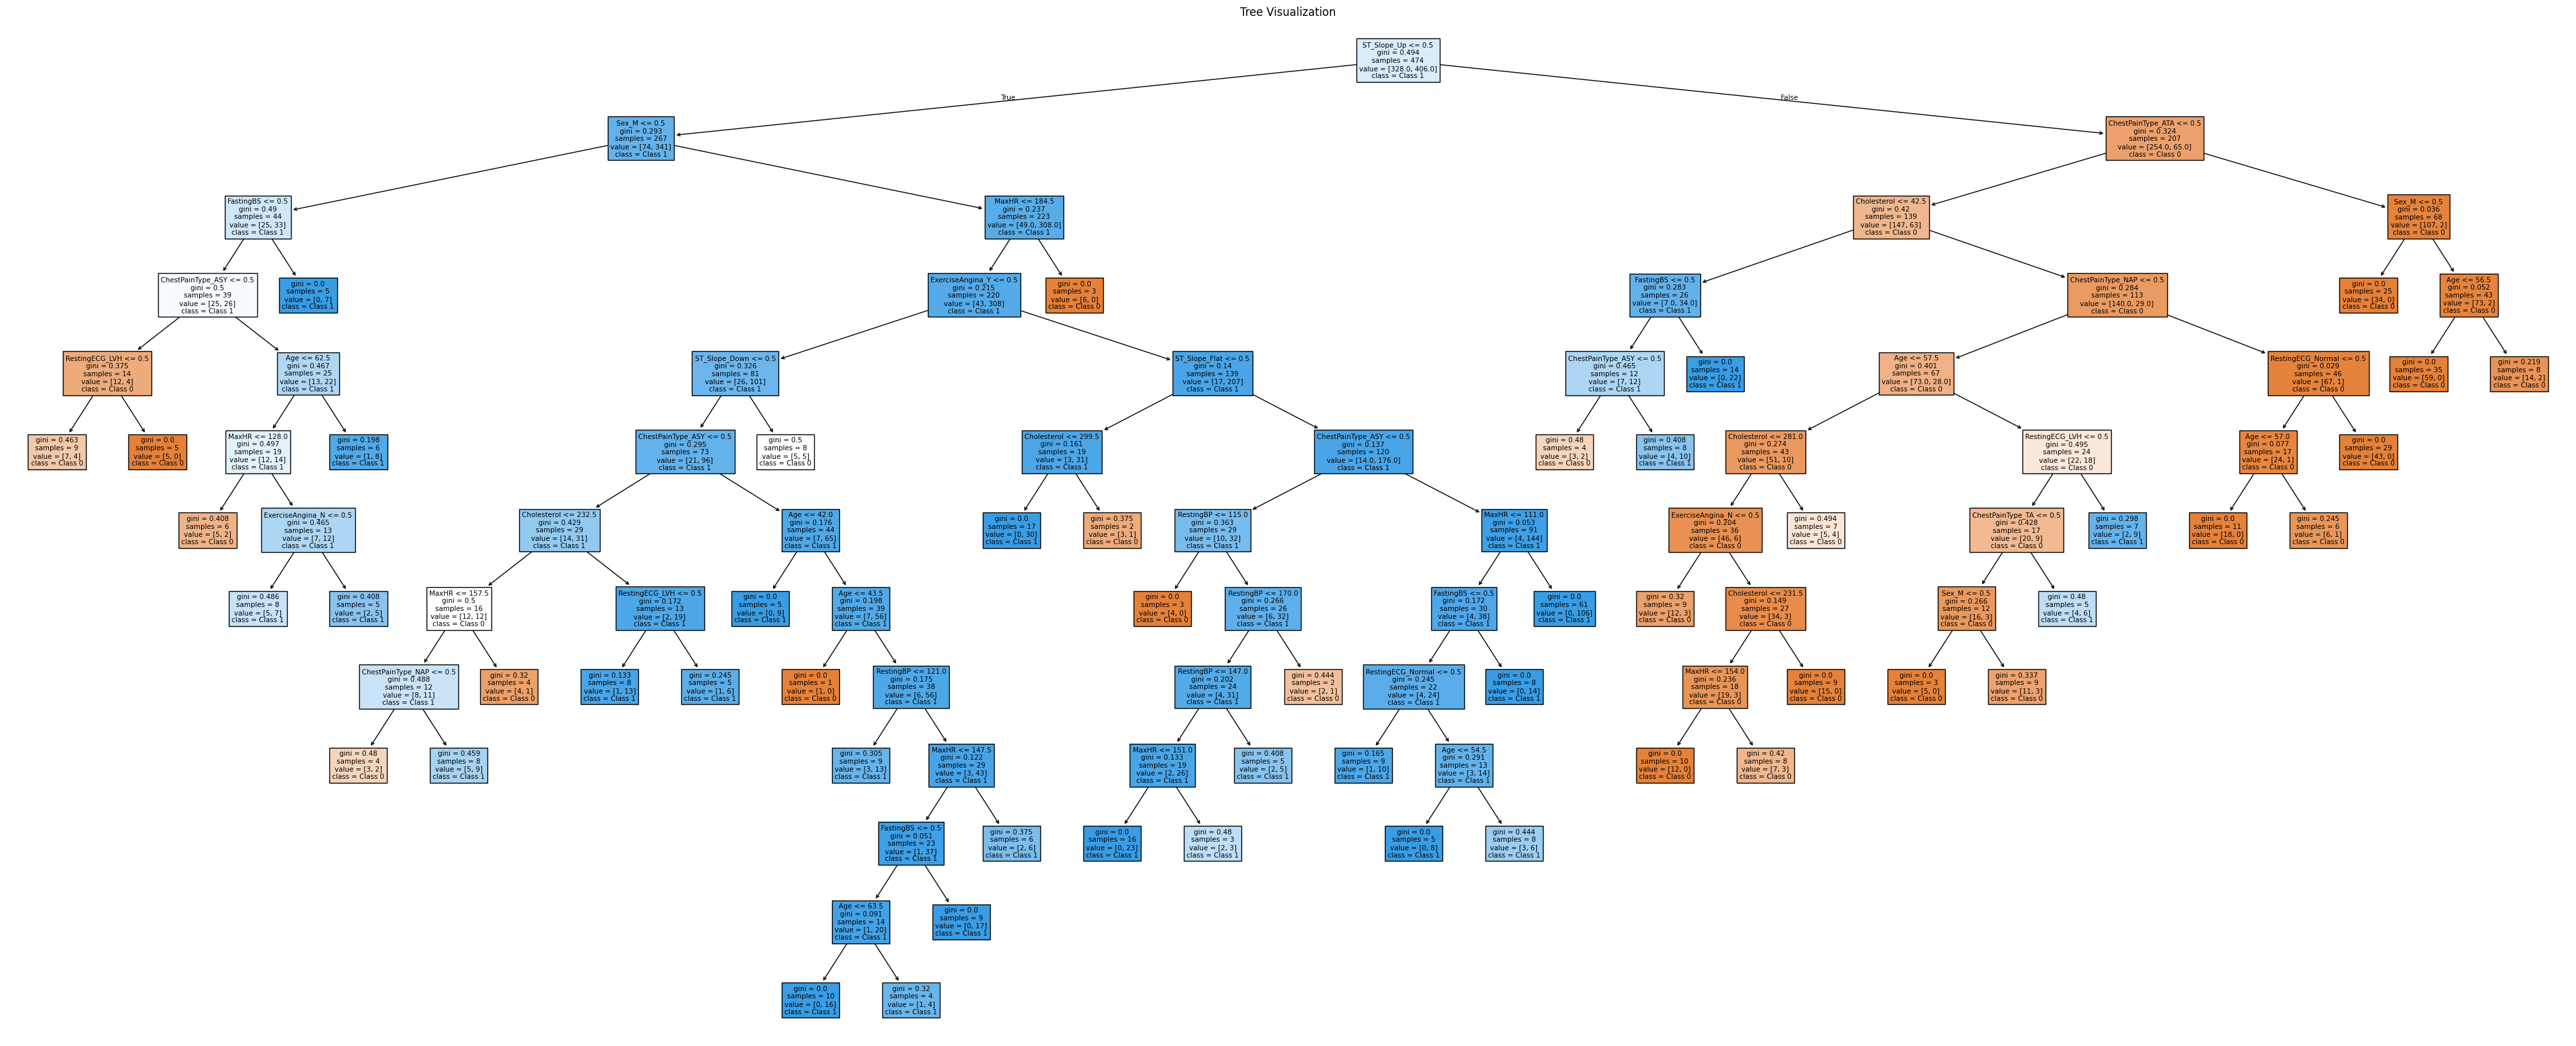

In [73]:
single_tree = random_forest_model.estimators_[0]

plt.figure(figsize=(50,20))
plot_tree(
    single_tree,
    feature_names = X_train.columns,
    class_names = ["Class 0", "Class 1"],
    filled = True
)
plt.title("Tree Visualization")
plt.show()